In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tqdm import tqdm

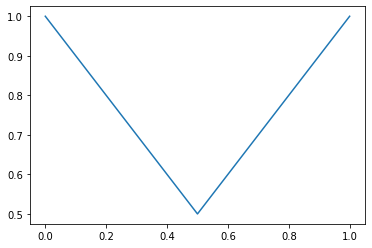

In [2]:
alpha = 0.4

def P_0(eta):
    return np.max([eta, 1-eta])


def Prob(n,alpha,beta):
    p0 = np.exp(-(alpha+beta)**2)
    if n==0:
        return p0
    else:
        return 1-p0
    
def Prob_Outcome(n, alpha, beta, eta):
    q=0
    for a,et in zip([alpha, -alpha], [eta, 1-eta]):
       q+= et*Prob(n,a,beta)
    return q

def Postirior(n, alpha, beta, eta):
    po = Prob(n, alpha, beta)*eta
    po /= Prob_Outcome(n, alpha, beta, eta)
    return po

def P_1(beta, eta):
    p=0
    for n in [0,1]:
        p+= Prob_Outcome(n, alpha, beta,eta)*P_0(Postirior(n, alpha, beta,eta))
    return 1-p

In [10]:
give_lim= lambda eta,a : ((-2,2)) if eta>0.01 else ((a-1e-5, a+1e-5))


etas_min = np.linspace(1e-10,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    optimization = optimize.minimize_scalar(P_1, args=(eta), method="bounded", bounds = give_lim(eta,alpha))#, bonuds= bounds=((-2,2)))#, options={"maxiter":10**9, "xatol":1e-35})
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
BOPT[0,len(etas_min):] = -BOPT[0,:len(etas_min)][::-1]


100%|██████████| 100/100 [00:00<00:00, 1032.12it/s]


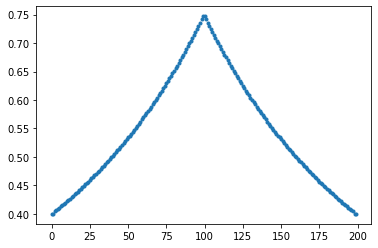

In [13]:
plt.plot(np.abs(BOPT[0]),'.')